In [1]:
import jpype
from konlpy.tag import Twitter
from collections import Counter

In [2]:
INPUT_FILE_NAME = 'BBD.txt'
OUTPUT_FILE_NAME = 'BBD_divided.txt'

def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list

In [3]:
def main():
    text_file_name = "BBD.txt"
    # 분석할 파일
    noun_count = 20
    # 최대 많은 빈도수 부터 20개 명사 추출
    output_file_name = "count.txt"
    # count.txt 에 저장
    open_text_file = open(text_file_name, 'r')
    # 분석할 파일을 open 
    text = open_text_file.read() #파일을 읽습니다.
    tags = get_tags(text, noun_count) # get_tags 함수 실행
    open_text_file.close()   #파일 close
    open_output_file = open(output_file_name, 'w')
    # 결과로 쓰일 count.txt 열기
    for tag in tags:
        noun = tag['tag']
        count = tag['count']
        open_output_file.write('{} {}\n'.format(noun, count))
    # 결과 저장
    open_output_file.close() 

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

text = open('BBD_clean2.txt','rt', encoding='UTF-8').read()
font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud= WordCloud().generate_from_frequencies(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# keywords = {'이것':5, '예문':3, '단어':5, '빈도수':3}

#wordcloud = WordCloud()
#wordcloud = wordcloud.generate_from_text(texts)
#wordcloud = wordcloud.generate_from_frequencies(keywords)

AttributeError: 'str' object has no attribute 'items'

In [9]:
pip install KRWordRank

Note: you may need to restart the kernel to use updated packages.


In [10]:
from krwordrank.word import KRWordRank

texts = open('욕막대2.txt','r',encoding='utf8').read()
#texts = replaceAll('당가니엘','')

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 11
done = 1 Early stopped.


In [11]:
from wordcloud import WordCloud

texts = open('욕막대2.txt','r',encoding='utf8').read()
#keywords = {'개':1539, '놈':1480, '년':1441, '년':1377,'거지':876, '개돼지':539, '똥':497, '새끼':456, '매국노':447, '사형':434, '시발':390, '쓰레기':390, '악마': 345, '돼지':239, '지랄':213, '버러지':70, '혐':55,'좆':37,'병신':11 }

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)

wordcloud = wordcloud.generate_from_text(texts)
#wordcloud = wordcloud.generate_from_frequencies(keywords)

In [12]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


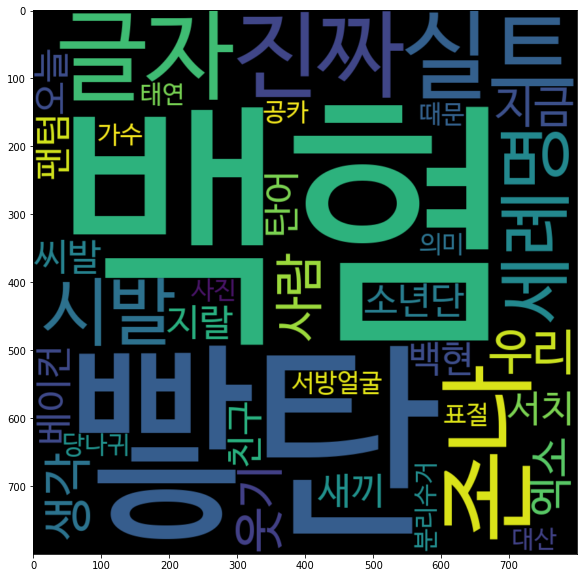

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')